To run notebook on other machines at CSS
## jupyter notebook --ip xx.xx.xx.xxx --port xxxx


In [1]:
print ("MNIST Tutorial 2")

MNIST Tutorial 2


In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

C:\Users\tgibbons\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
print (np.__version__)

1.14.0


In [7]:
import keras
print (keras.__version__)

2.1.4


In [8]:
from keras.datasets import mnist
# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 8s 1us/step


In [9]:
print (X_train.shape)

(60000, 28, 28)


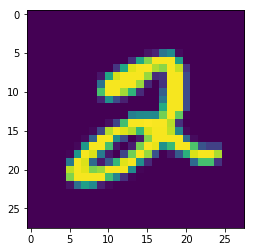

In [10]:
from matplotlib import pyplot as plt
plt.imshow(X_train[5])

In [11]:
X_train2 = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test2 = X_test.reshape(X_test.shape[0], 28, 28, 1)
print (X_train.shape)
print (X_train2.shape)
print (X_train[:1])


(60000, 28, 28)
(60000, 28, 28, 1)
[[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
     0   0   0   0   0   0   0   0   0   0   0]
  [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126
   136 175  26 166 255 247 127   0   0   0   0]
  [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253
   253 225 172 253 242 195  64   0   0   0   0]
  [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253
   251  93  82  82  56  39   0   0   0   0   0]
  [  0   0   

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train_norm = X_train / 255
X_test_norm = X_test / 255
X_train2 = X_train2.astype('float32')
X_test2 = X_test2.astype('float32')
X_train_norm2 = X_train2 / 255
X_test_norm2 = X_test2 / 255

In [13]:
print (X_train_norm2.shape)
print (X_train_norm2[:1])

(60000, 28, 28, 1)
[[[[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]]

  [[0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
   [0.        ]
 

In [14]:
print (y_train[:10])


[5 0 4 1 9 2 1 3 1 4]


In [15]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print (Y_train.shape)
print (Y_train[:10])

(60000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [17]:
model = Sequential()

#model.add(Conv2D(32,(3,3), border_mode='same',kernel_initializer='uniform',input_shape=(28,28,1),dim_ordering='tf',name='conv_1.1'))
#model.add(Conv2D(16, 3,3, border_mode='same', input_shape=(1, 28, 28), activation='relu'))
#model.add(Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28,28)))
#model.add(Conv2D(32, (3, 3), activation="relu"))

model.add(Conv2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#model.add(Dense(32, activation='relu', input_dim=(28*28)))
#model.add(Dense(16, activation='relu'))
#model.add(Dense(10, activation='softmax'))




C:\Users\tgibbons\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  


In [18]:
# 8. Compile model
model.compile(optimizer='adam',            loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer=RMSprop(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
# 9. Fit model on training data
batch_size = 128
num_classes = 10
epochs = 12

#model.fit(X_train, Y_train, batch_size=32, epoch=10, verbose=1)
#model.fit(X_train, Y_train, batch_size=32, epochs=10)
model.fit(X_train_norm2, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test_norm2, Y_test))
# 10. Evaluate model on test data
#score = model.evaluate(X_test, Y_test, verbose=0)

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 29s 478us/step - loss: 0.3527 - acc: 0.8934 - val_loss: 0.1064 - val_acc: 0.9692
Epoch 2/12
60000/60000 [==============================] - 28s 467us/step - loss: 0.1441 - acc: 0.9573 - val_loss: 0.0649 - val_acc: 0.9798
Epoch 3/12
60000/60000 [==============================] - 27s 458us/step - loss: 0.1056 - acc: 0.9686 - val_loss: 0.0564 - val_acc: 0.9814
Epoch 4/12
60000/60000 [==============================] - 29s 483us/step - loss: 0.0884 - acc: 0.9740 - val_loss: 0.0480 - val_acc: 0.9837
Epoch 5/12
60000/60000 [==============================] - 27s 456us/step - loss: 0.0787 - acc: 0.9760 - val_loss: 0.0465 - val_acc: 0.9852
Epoch 6/12
60000/60000 [==============================] - 27s 456us/step - loss: 0.0702 - acc: 0.9779 - val_loss: 0.0439 - val_acc: 0.9855
Epoch 7/12
60000/60000 [==============================] - 27s 457us/step - loss: 0.0633 - acc: 0.9804 - val_loss: 0.